# Automated Data Retreival

The semi-automatic retrieval of data is valuable for documenting and reconstructing work related to hydrology.  What follows is scripting by a colleague that can be used for future efforts.

:::{note}
I have modified his original work to render on my web server - main changes are to suppress interactive behavior, and to split the code up a bit.  Otherwise it is Moise's original Thesis work unchanged!
:::

## A Hydrological Data Analysis and Visualization Toolkit

- *Author*: Moise Baraka, Ph.D. Student in CECE Water Resources, Texas Tech University
- *Date*: 02/21/2024
- *Supervised by* Theodore Cleveland, Ph.D. CECE Water Resources, Associate Professor, Texas Tech University
- *class of* spring 2024 in Surface Water Hydrology

- Description:
*This toolkit provides a collection of functions for retrieving, processing, analyzing, and visualizing hydrological data from the USGS web server. It includes modules for retrieving rating curve data, fitting it, computing statistical measures, generating histograms, and plotting various hydrological data attributes. The program allows users to input station codes to retrieve specific data and provides visualizations for any station monitored by the USGS program.*
---

### STREAMFLOW DATA RETRIEVAL

- **Step 1: Input Collection**

The script prompts the user to input the USGS station ID, start date, and end date.

- **Step 2: Directory Selection**

The user is prompted to input the directory where the data will be saved. If no directory is provided, it defaults to a predefined directory, which must have been defined in the script.

- **Step 3: URL Construction**

The script constructs a URL using the provided station ID, start date, and end date. This URL is used to retrieve the data from the USGS website.

- **Step 4: Data Retrieval**

The script downloads the data from the constructed URL. During the download process, it displays a progress bar or percentage showing the download progress.

- **Step 5: Data Saving**

The downloaded data is saved to the specified directory with a filename indicating the station code and data type.

:::{note}
Here we load required modules
:::

In [44]:
import re
import urllib.request
import tqdm
import time
import os

:::{note}
Date parser function.  
:::

In [45]:
#------------------------------------------------------------------------
def get_date_input(prompt):
    while True:
        date_input = input(prompt)
        # Validate date format
        if re.match(r'^\d{4}-\d{2}-\d{2}$', date_input):
            return date_input
        else:
            print("Invalid date format. Please use yyyy-mm-dd format.")

:::{note}
Directory selector function
:::

In [46]:
#------------------------------------------------------------------------
def get_save_directory_input(default_directory):
    while True:
        save_directory = input(f"Enter the directory to save the data (press Enter to use default directory {default_directory}): ")
        if not save_directory:
            return default_directory
        # Validate directory exists
        elif os.path.isdir(save_directory):
            return save_directory
        else:
            print("Directory does not exist. Please enter a valid directory.")

:::{note}
Here we build the URL to generate the request to USGS server(s)
:::

In [47]:
#------------------------------------------------------------------------
def build_url1(station_code, start_date, end_date):
    base_url = 'https://nwis.waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no='
    query_params = '&search_site_no_match_type=exact&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=' \
                   'LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00060=1' \
                   '&group_key=NONE&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no' \
                   '&column_name=station_nm&range_selection=date_range&begin_date=' + start_date + '&end_date=' + end_date + \
                   '&format=rdb&date_format=YYYY-MM-DD&rdb_compression=value&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection'

    return base_url + station_code + query_params

:::{note}
Now the retreival step.  Some output is suppressed for JupyterBook
:::

In [48]:
#------------------------------------------------------------------------
# Retrieve and save data from a URL, and return the filename
def retrieve_and_save_data(url, filename):
    print("\nDownloading data from:", url , '\n')
    response = urllib.request.urlopen(url)
    total_size = int(response.headers.get('content-length', 0))
    downloaded = 0
    chunk_size = 1024
    start_time = time.time()  # Record start time
    with open(filename, 'wb') as file:
        while True:
            chunk = response.read(chunk_size)
            if not chunk:
                break
            file.write(chunk)
            downloaded += len(chunk)
            if total_size > 0:
                progress = downloaded / total_size * 100
            else:
                # Assume 1.2 seconds download time if total_size is zero
                elapsed_time = time.time() - start_time
                progress = min(100, elapsed_time / 1.2 * 100)
#            print(f"Estimated downloading progress: {progress:.1f}%\r", end='') 
    print("\nData saved to:", filename)
    return filename

:::{note}
Here is the batch request (deactivate for interactive)
:::

In [49]:
station_code = '07297910'
start_date = '1936-01-01'
end_date = '2024-02-01'
save_directory = './' # suppress and actiovate above for interactive

:::{note}
Here is the interactive part (activate for interactive)
:::

```
#--------------------------------------------------------------------------
#                          Define the inputs
#--------------------------------------------------------------------------
print(" ------------------------------------------",
        "\n Please provide the following information:",
        "\n ------------------------------------------")


# activate code below and suppress above 3 lines for interactive
#station_code = input('- USGS station ID: ')
#start_date = get_date_input('- Start Date (yyyy-mm-dd): ')
#end_date = get_date_input('- End Date (yyyy-mm-dd): ')



#--------- !!! Define the directory where the data will be saved !!! -----------
default_directory = r"C:\Users\mbaraka\OneDrive - Texas Tech University\Thesis file"  # To be defined!

save_directory = get_save_directory_input(default_directory)
```

:::{note}
Here get the file from the remote
:::

In [50]:
#--------------------------------------------------------------------------
#        Define the base URLs for data retrieval from Website 1
#--------------------------------------------------------------------------
url1 = build_url1(station_code, start_date, end_date)

# Retrieve and save data from Website 1
filename1 = retrieve_and_save_data(url1, os.path.join(save_directory, f'USGS_Data_for_{station_code}.txt'))




Data saved to: ./USGS_Data_for_07297910.txt


## STATISTICS, HISTOGRAM AND FLOW DURATION CURVE

- **Data Processing:**

To begin with, the script processes text data saved previously, creating a DataFrame. It extracts relevant information such as agency code, site number, datetime, flow rate, and flag.

- **Statistical Analysis:**
  
The script performs statistical analysis on the flow rate data, calculating various metrics like median, mean, standard deviation, variance, minimum, maximum, quartiles, and interquartile range. It identifies and counts outliers based on the interquartile range method.

- **Plotting:**

The script plots two types of graphs:
 1. Flow Frequency Histogram with KDE (Kernel Density Estimation):

Plots the distribution of flow rates against frequency. Uses Kernel Density Estimation (KDE) for smooth estimation of the probability density function.

$$ P(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x-x_i}{h}\right) $$

where $P(x)$ is the density estimate at point $x$, $n$ is the number of data points, $h$ is the bandwidth, $x_i$ are the data points, and $K$ is the kernel function.
    
 2. Flow Duration Curve (FDC) with Weibull formula and legend:

Plots the flow rate against the probability of exceedance or equality. Computes the cumulative probability using the Gringorten method, a generalized version of the Weibull formula, defined as follows:
$$ P(X \geq x) = \left(1 - \left(\frac{i-0.4}{n+0.2}\right)\right) \times 100 $$

where $P(X \geq x)$ is the cumulative probability of exceeding or equaling $x$, $i$ is the rank of the data point, and $n$ is the total number of data points.


*Note: Both plots are customized with appropriate labels, titles, gridlines, and legends.*

- **Outputs:**
  
The script generates CSV files containing processed data and statistical analysis results. It also saves PNG images of the flow frequency histogram and flow duration curve.

- **Libraries Used:**
  
    1. pandas: For data manipulation and analysis.
    2. numpy: For mathematical operations.
    3. matplotlib.pyplot: For plotting graphs.
    4. seaborn: For enhanced data visualization.
    5. io: For handling file I/O operations.

:::{note}
Load the modules (libraries)
:::

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

:::{note}
Function to process the download data and build a pandas dataframe.
:::

In [52]:
#------------------------------------------------------------------------
# Process data from a text file and return a cleaned DataFrame for Website 1
def process_website1_data(filename, station_code):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("USGS"):
                parts = line.split("\t")
                agency_cd, site_no, datetime, flow_rate, flag = parts[:5]
                data.append([agency_cd, site_no, datetime, flow_rate, flag])

    df = pd.DataFrame(data, columns=['agency_cd', 'site_no', 'datetime', 'flow_rate', 'flag'])
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df['flow_rate'] = pd.to_numeric(df['flow_rate'], errors='coerce')
    df.set_index('datetime', inplace=True)
    
    # Filter and keep rows where 'flag' is not equal to "P"
    df = df[df['flag'] != 'P\n']
    
    df.dropna(subset=['flow_rate'], inplace=True)

    csv_filename1 = os.path.join(save_directory, f'{station_code}_flow_data.csv')
    df.to_csv(csv_filename1)
    
    return df

:::{note}
Function to analyze the pandas dataframe, report relevant statistics, and save the results to a CSV file
:::

In [53]:
#------------------------------------------------------------------------
def analyze_data(df):
    """
    Performs statistical analysis on the flow rate data and saves the results to a CSV file.

    Parameters:
    df (DataFrame): DataFrame containing flow rate data.
    """
    sample_size = len(df)
    median = df['flow_rate'].median()
    mean = df['flow_rate'].mean()
    std = df['flow_rate'].std()
    variance = df['flow_rate'].var()
    minimum = df['flow_rate'].min()
    maximum = df['flow_rate'].max()
    first_quartile = df['flow_rate'].quantile(0.25)
    third_quartile = df['flow_rate'].quantile(0.75)
    interquartile_range = third_quartile - first_quartile
    
    # Calculate number of outliers
    outliers = df[(df['flow_rate'] < first_quartile - 1.5 * interquartile_range) | (df['flow_rate'] > third_quartile + 1.5 * interquartile_range)]
    num_outliers = len(outliers)

    # Display statistics
    print("--------- Statistics: ----------\n")
    print(f"-  Sample Size: {sample_size}")
    print(f"-  Median: {median:.2f}")
    print(f"-  Mean: {mean:.2f}")
    print(f"-  Standard Deviation: {std:.2f}")
    print(f"-  Variance: {variance:.2f}")
    print(f"-  Minimum: {minimum:.2f}")
    print(f"-  Maximum: {maximum:.2f}")
    print(f"-  First Quartile: {first_quartile:.2f}")
    print(f"-  Third Quartile: {third_quartile:.2f}")
    print(f"-  Interquartile Range: {interquartile_range:.2f}")
    print(f"-  Number of Outliers: {num_outliers}")
    print()
    
    # Create DataFrame for statistics
    statistics_df = pd.DataFrame({
        'Statistic': ['Sample Size', 'Median', 'Mean', 'Standard Deviation', 'Variance', 'Minimum', 'Maximum', 'First Quartile', 'Third Quartile', 'Interquartile Range', 'Number of Outliers'],
        'Value': [sample_size, median, mean, std, variance, minimum, maximum, first_quartile, third_quartile, interquartile_range, num_outliers]
    })

    # Save statistics to CSV file
    statistics_filename = os.path.join(save_directory, f'{station_code}_statistics.csv')
    statistics_df.to_csv(statistics_filename, index=False)

:::{note}
Function to plot a flow frequency diagram from the dataframe.
:::

In [54]:
#------------------------------------------------------------------------
def plot_flow_frequency_histogram(df):
    """
    Plots the flow frequency histogram with a fitted KDE based on the flow rates in the DataFrame.

    Parameters:
    df (DataFrame): DataFrame containing flow rate data.
    """
    plt.figure(figsize=(9, 6))
    ax = sns.histplot(df['flow_rate'], bins=80, kde=True, edgecolor='black')
    kde_color = 'red'
    kde_alpha = 0.5
    ax.get_lines()[0].set_color(kde_color)
    ax.get_lines()[0].set_alpha(kde_alpha)
    ax.set_title('Flow Frequency Histogram', fontsize=16)
    ax.set_xlabel('Flow Rate (cfs)', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Ensure tight layout to prevent cropping of labels
    plt.savefig(os.path.join(save_directory, f'{station_code}_flow_frequency_histogram.png'))
    plt.show()

:::{note}
Function to plot a flow duration curve from the dataframe.
:::

In [55]:
#------------------------------------------------------------------------
def plot_flow_duration_curve(df):
    """
    Plots the flow duration curve (FDC).

    Parameters:
    df (DataFrame): DataFrame containing flow rate data.
    """
    # Sort the flow rates in descending order
    df_sorted = df.sort_values('flow_rate', ascending=False)

    # Compute the cumulative probability
    # The generalized form proposed by Gringorten (1963) a = 0.4
    df_sorted['cumulative_probability'] = ((np.arange(len(df_sorted))+0.6) / (len(df_sorted)+1.2)) * 100

    # Plot the flow duration curve
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.semilogy(df_sorted['cumulative_probability'], df_sorted['flow_rate'])
    ax.set_title('Flow Duration Curve', fontsize=18)
    ax.set_xlabel('Probability of exceedance or equality (\%)', fontsize=16)
    ax.set_ylabel('Flow Rate ($ft^3/s$)', fontsize=16)
    ax.grid(which='both')

    # Add legend with the Weibull formula
    equation = r'$P(X \geq x) = \left(1 - \left(\frac{i-0.4}{n+0.2}\right)\right) \times 100$'
    #ax.legend(['Flow Duration Curve', f'Weibull Fit: {equation}'], bbox_to_anchor=(0.35, .95), loc='upper left', fontsize=16)

    # Add text box with the Weibull formula
    ax.text(0.25, 0.8, f'Weilbull formula: {equation}', transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=dict(facecolor='white', alpha=1))

    plt.tight_layout()  # Ensure tight layout to prevent cropping of labels
    
    plt.savefig(os.path.join(save_directory, f'{station_code}_fdc.png'))
    plt.show()

:::{note}
Pocess the download data, build a pandas dataframe; then plot the flood frequency histogram, report summary statistics, and plot the flow duration curve.
:::

Data from Website 1:
           agency_cd   site_no  flow_rate flag
datetime                                      
1967-10-01      USGS  07297910        0.1    A
1967-10-02      USGS  07297910        0.1    A
1967-10-03      USGS  07297910        0.1    A
1967-10-04      USGS  07297910        0.1    A
1967-10-05      USGS  07297910        0.1    A


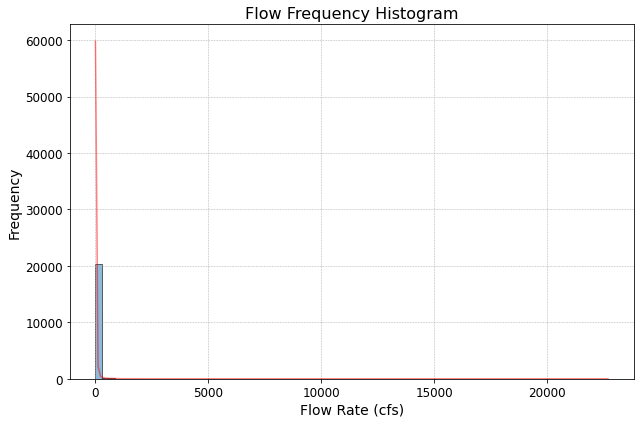

--------- Statistics: ----------

-  Sample Size: 20578
-  Median: 3.80
-  Mean: 26.72
-  Standard Deviation: 257.99
-  Variance: 66560.94
-  Minimum: 0.00
-  Maximum: 22700.00
-  First Quartile: 0.80
-  Third Quartile: 11.00
-  Interquartile Range: 10.20
-  Number of Outliers: 2038



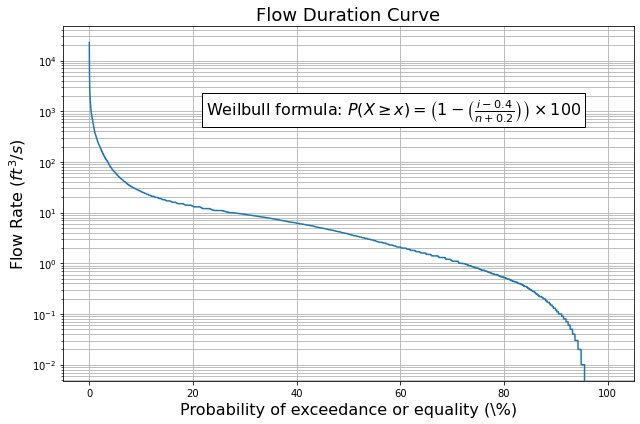

In [56]:
#--------------------------------------------------------------------------
#      Preprocess the Retrieved Data and Display the Head Part of it 
#--------------------------------------------------------------------------
df1 = process_website1_data(filename1, station_code)

# Display the first few rows of data from Website 1
print("Data from Website 1:")
print(df1.head())

#--------------------------------------------------------------------------
#                                 Plotting 
#--------------------------------------------------------------------------
# Plot the flow frequency histogram with a fitted KDE
plot_flow_frequency_histogram(df1)

# Statistical analysis
analyze_data(df1)

# Flow duration curve
plot_flow_duration_curve(df1)

## TEMPORAL PATTERN

**Data Processing:**

After plotting the rating curve, a script is written to process flow rate data stored in the DataFrame generated from the previous step. It calculates yearly means with standard deviations. It also performs linear regression to fit trend lines to the data.

**Plotting:**

Two types of plots are generated:
   1. Yearly Moving Averages: Plots the yearly moving averages of flow rate data with error bars representing standard deviations.

   2. A Trend Line (Linear Regression): Fits a trend line to the yearly means using linear regression. The equation of the trend line is of the form: $$ y = mx + c $$

where $m$ is the slope (coefficient), $x$ is the year, and $c$ is the intercept.

   3. Confidence Intervals: Calculates the 95% confidence interval for the trend line using the t-distribution. The formula for the margin of error is: $$ E = t \times \frac{s}{\sqrt{n}} $$

where $E$ is the margin of error, $t$ is the critical t-value, $s$ is the standard deviation of the sample means, and $n$ is the sample size.

**Outputs:**

The script generates two plots: daily flow rates and yearly means with trend lines and confidence intervals. Then the script saves the plot of yearly means as a PNG image.

**Libraries Used:**
  1. numpy: For mathematical operations.
  2. matplotlib.pyplot: For plotting graphs.
  3. scipy.stats.t: For computing t-values for confidence intervals.
  4. sklearn.linear_model.LinearRegression: For performing linear regression.
 linear regression.


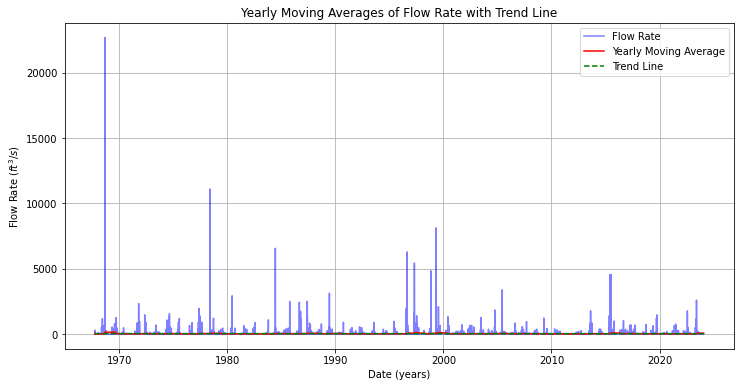

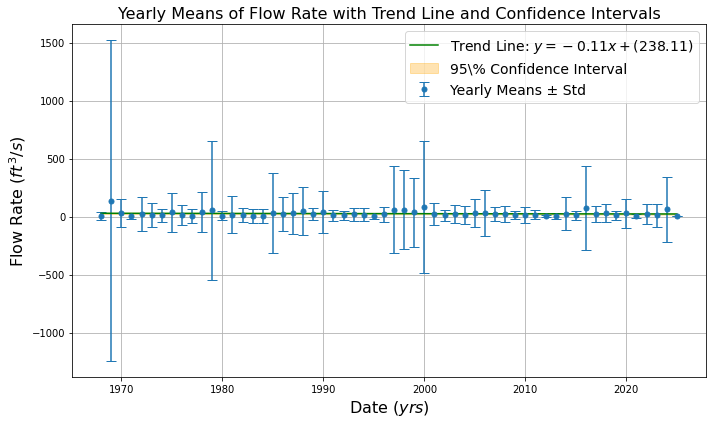

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from sklearn.linear_model import LinearRegression

#------------------------------------------------------------------------
def plot_yearly_moving_average(df):
    """
    Plots the yearly moving averages of flow rate data along with a trend line.

    Parameters:
    df (DataFrame): DataFrame containing flow rate data.
    """
    # Compute yearly moving averages
    yearly_ma = df['flow_rate'].rolling(window=365, min_periods=1).mean()
    
    # Plot data and moving averages
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['flow_rate'], label='Flow Rate', color='blue', alpha=0.5)
    plt.plot(yearly_ma.index, yearly_ma, label='Yearly Moving Average', color='red')
    
    # Fit a trend line
    trend_coef = np.polyfit(df.index.to_julian_date(), df['flow_rate'], 1)
    trend_line = np.poly1d(trend_coef)
    plt.plot(df.index, trend_line(df.index.to_julian_date()), label='Trend Line', linestyle='--', color='green')

    plt.title('Yearly Moving Averages of Flow Rate with Trend Line')
    plt.xlabel('Date (years)')
    plt.ylabel('Flow Rate ($ft^3/s$)')
    plt.legend()
    plt.grid(True)
    plt.show()

#------------------------------------------------------------------------
def plot_yearly_means_with_trend(df):
    """
    Plots the yearly means of flow rate data with error bars (std) and a trend line with shaded confidence intervals.
    NaN values in flow rate are replaced by the mean of all non-NaN flow rates,
    and NaN values in standard deviation are replaced by the mean of all non-NaN standard deviations.

    Parameters:
    df (DataFrame): DataFrame containing flow rate data.
    """
    # Compute yearly means and standard deviations
    yearly_means = df['flow_rate'].resample('Y').mean()
    yearly_std = df['flow_rate'].resample('Y').std()

    # Replace NaN values in flow rate with the mean of all non-NaN flow rates
    yearly_means.fillna(yearly_means.mean(), inplace=True)
    
    # Replace NaN values in std with the mean of all non-NaN std
    yearly_std.fillna(yearly_std.mean(), inplace=True)
    
    # Prepare data for linear regression
    X = yearly_means.index.year.values.reshape(-1, 1)
    y = yearly_means.values
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Compute trend line values
    trend_values = model.predict(X)
    
    # Compute overall mean and standard deviation of yearly means
    overall_mean = yearly_means.mean()
    overall_std = yearly_means.std()
    
    # Compute t-value for a 95% confidence interval with n-1 degrees of freedom
    t_value = t.ppf(0.975, len(yearly_means) - 1)
    
    # Compute margin of error
    margin_of_error = t_value * overall_std / np.sqrt(len(yearly_means))
    
    # Compute upper and lower bounds of the confidence interval for the overall mean
    upper_bound = trend_values + margin_of_error
    lower_bound = trend_values - margin_of_error
    
    # Plot yearly means with error bars
    plt.figure(figsize=(10, 6))
    plt.errorbar(yearly_means.index, yearly_means, yerr=yearly_std, fmt='o', markersize=5, capsize=5, label='Yearly Means ± Std')
    
    # Plot trend line
    plt.plot(yearly_means.index, trend_values, label=f'Trend Line: $y = {model.coef_[0]:.2f}x + ({model.intercept_:.2f})$', linestyle='-', color='green')
    
    # Shade confidence interval
    plt.fill_between(yearly_means.index, lower_bound, upper_bound, color='orange', alpha=0.3, label='95\% Confidence Interval')
    
    plt.title('Yearly Means of Flow Rate with Trend Line and Confidence Intervals', fontsize=16)
    plt.xlabel('Date $(yrs)$', fontsize=16)
    plt.ylabel('Flow Rate $(ft^3/s)$', fontsize=16)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.tight_layout()  # Ensure tight layout to prevent cropping of labels
    plt.savefig(os.path.join(save_directory, f'{station_code}_yearly_mean.png'))
    plt.show()
    return #yearly_means

#------------------------------------------------------------------------
#                         Moving average 
#------------------------------------------------------------------------
plot_yearly_moving_average(df1)
plot_yearly_means_with_trend(df1)


---

## Rating Curve

Based on the station code, the script retrieves rating curve data from the USGS website using the station code provided as input. It then fits a rating curve equation of the form $H(Q) = a \cdot Q^b + \frac{1}{c}$ to the data, where $H$ is gage height and $Q$ is discharge. The fitting is performed by minimizing the residuals between the observed and predicted gage heights. The R-squared value is computed as a measure of goodness-of-fit.

### Outputs:
- Plot of the original rating curve data.
- Plot of the fitted rating curve along with the equation and R-squared value.
- If successful, the script also saves the fitted curve plot as a PNG file.

### Functions:
1. retrieve_rating_curve_data(station_code): Retrieves and cleans rating curve data from the USGS website.
2. plot_original_data(df_rating): Plots the original rating curve data.
3. objective_function(params, df_rating, equation_func): Objective function to minimize residuals and maximize R-squared.
4. fit_rating_curve(df_rating): Fits the rating curve equation to the data using optimization.
5. plot_fitted_curve(df_rating, params, r_squared): Plots the fitted rating curve along with the equation and R-squared value.
6. main(station_code): Main function to execute the entire process.

### Libraries Used:
- numpy: For mathematical operations.
- pandas: For data manipulation.
- matplotlib.pyplot: For plotting graphs.
- scipy.optimize.minimize: For optimization to fit the curve.
- sklearn.metrics.r2_score: For computing the R-squared value.
- requests: For retrieving data from the USGS website.
om the USGS website.


:::{note}
Import Libaries
:::

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import r2_score
import requests 

:::{note}
Rating equation structure is a power-law model; fitted values are $a$,$b$, and $c$
:::

In [59]:
# Define the equation a * Q^b + c
def rating_equation(Q, a, b, c):
    return a * np.power(Q, b) + 1/c

:::{note}
Retreive rating curve from original database - not are downloading again, so still need the mighty Internet to work!
:::

In [60]:
# Retrieve rating curve data
def retrieve_rating_curve_data(station_code):
    url = f"https://waterdata.usgs.gov/nwisweb/get_ratings?file_type=exsa&site_no={station_code}"
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to retrieve data for station code {station_code}.")
    df = pd.read_csv(response.url, skiprows=29, delimiter="\t", names=["INDEP", "SHIFT", "DEP", "STOR"])
    df = df[["INDEP", "DEP"]]
    df.columns = ["Gage Height", "Discharge"]
    df["Gage Height"] = pd.to_numeric(df["Gage Height"], errors="coerce")
    df["Discharge"] = pd.to_numeric(df["Discharge"], errors="coerce")
    df = df.dropna()
    df = df.sort_values(by="Discharge")
    return df

:::{note}
Plot the rating cruve
:::

In [61]:
# Plot the original rating curve data
def plot_original_data(df_rating):
    plt.figure(figsize=(10, 6))
    plt.scatter(df_rating['Discharge'], df_rating['Gage Height'], label='Original data', color='steelblue')
    plt.xlabel('Discharge $(ft^3/s)$', fontsize=14)
    plt.ylabel('Gage Height $(ft)$', fontsize=14)
    plt.title('Original Rating Curve Data', fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=16)
    plt.tight_layout()
    plt.show()

:::{note}
An obective function to be minimized to recover $a$,$b$, and $c$ in rating equation.  Will probably work in log-space so the optimization is OLS.
:::

In [62]:
# Objective function to minimize R-squared
def objective_function(params, df_rating, equation_func):
    predicted_gage_height = equation_func(df_rating['Discharge'], *params)
    ss_residuals = np.sum((df_rating['Gage Height'] - predicted_gage_height)**2)
    ss_total = np.sum((df_rating['Gage Height'] - np.mean(df_rating['Gage Height']))**2)
    
    # Check if ss_total is close to zero
    if ss_total < 1e-10:  # Adjust threshold as needed
        return -1e10      # Return a large negative value to discourage such solutions
    
    r_squared = 1 - (ss_residuals / ss_total)
    return -r_squared      # Minimize negative R-squared

:::{note}
The fitting method - in this case Nelder-Mead downhill simplex method.
:::

In [63]:
#------------------------------------------------------------------------
# Fit the equation using minimization of residuals
def fit_rating_curve(df_rating):
    x0 = np.ones(3)  # Initial guess for parameters [a, b, c]
    res = minimize(objective_function, x0, args=(df_rating, rating_equation), method='Nelder-Mead')
    if res.success:
        # Calculate predicted gage heights
        predicted_gage_heights = rating_equation(df_rating['Discharge'], *res.x)
        
        # Calculate R-squared
        r_squared = r2_score(df_rating['Gage Height'], predicted_gage_heights)
        
        return res.x, r_squared
    else:
        print("Fitting failed:", res.message)  # Print out the error message
        return None, None

:::{note}
Plotting the fitted curve
:::

In [64]:
# Plot the fitting rating curve
def plot_fitted_curve(df_rating, params, r_squared):
    # Define colors for scatter and curve
    scatter_color = 'steelblue'
    curve_color = 'darkorange'

    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot original data as scatter points
    ax.scatter(df_rating['Discharge'], df_rating['Gage Height'], label='Original data', color=scatter_color, alpha=0.7)

    # Generate fitted curve
    Q_fit = np.linspace(df_rating['Discharge'].min(), df_rating['Discharge'].max(), 100)
    fitted_curve = rating_equation(Q_fit, *params)
    
    # Plot fitted curve
    ax.plot(Q_fit, fitted_curve, label=f'Fitted curve: $H(Q) = a \cdot Q^b + \\frac{{1}}{{c}}$', color=curve_color, linewidth=3)

    # Add equation and R-squared value as text box
    equation_text = f"$H(Q) = {params[0]:.3f} \cdot Q^{{{params[1]:.3f}}} + \\frac{{1}}{{{params[2]:.3f}}}$"
    r_squared_text = f"$R^2 = {r_squared:.4f}$"
    text_box_content = f"{equation_text}\n\n{r_squared_text}"
    ax.text(0.55, 0.35, text_box_content, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    # Set labels and title
    ax.set_xlabel('Discharge $(ft^3/s)$', fontsize=14)
    ax.set_ylabel('Gage Height $(ft)$', fontsize=14)
    ax.set_title('Fitted Rating Curve', fontsize=16)
    
    # Add grid
    ax.grid(True)

    # Add legend
    ax.legend(fontsize=16)

    # Adjust layout
    plt.tight_layout()

    # Save plot as PNG file
    plt.savefig(f'{station_code}fitted_rating_curve.png')

    # Show plot
    plt.show()

:::{note}
The supervisory script (aka Learn Dammit!)
:::

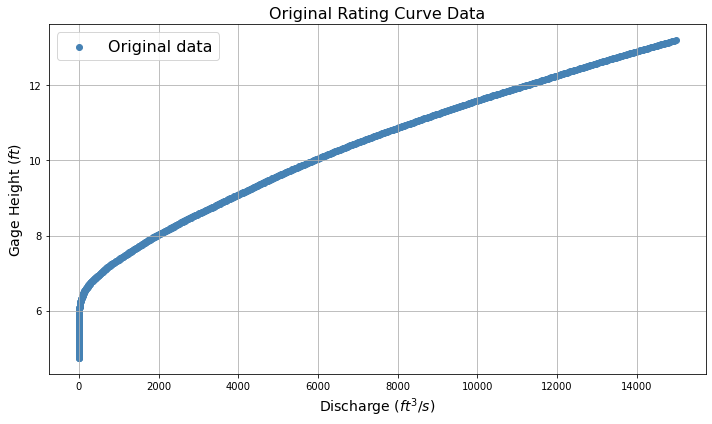

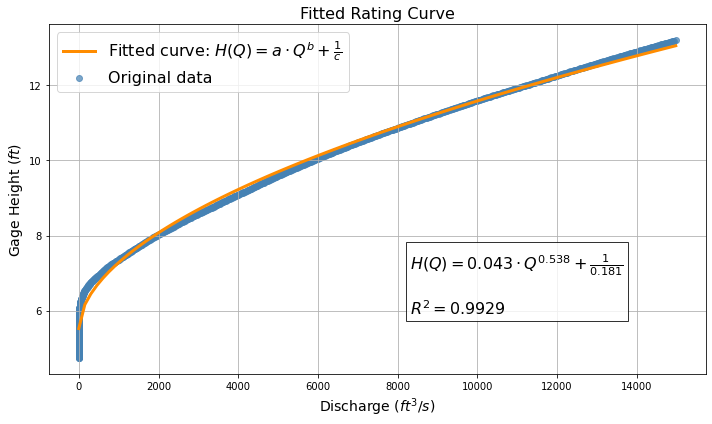

In [65]:
#Main function to operate the script
def main(station_code):
    # Step 1: Retrieve and clean data
    df_rating = retrieve_rating_curve_data(station_code)
    
    # Step 2: Plot original data
    plot_original_data(df_rating)
    
    # Step 3: Fit the curve
    params, r_squared = fit_rating_curve(df_rating)
    
    # Step 4: Plot the fitted curve
    if params is not None:
        plot_fitted_curve(df_rating, params, r_squared)
    else:
        print("Fitting failed. Unable to plot the fitted curve.")

#--------------------------------------------------------------------------
#           Call the main function by the station code
#--------------------------------------------------------------------------
main(station_code)

### References

- U.S. Geological Survey. (1996). *Data from Selected U.S. Geological Survey National Stream Water-Quality Monitoring Networks (WQN) on CD-ROM*. Retrieved from [https://pubs.usgs.gov/dds/wqn96cd/](https://pubs.usgs.gov/dds/wqn96cd/) on 11/29/2023.

- Vogel, R. M., & Fennessey, N. M. (1995). Flow duration curves II: a review of applications in water resources planning. *JAWRA Journal of the American Water Resources Association*, 31(6), 1029-1039.

- Bedient, P. B. (2002). *Hydrologic and Floodplain Analysis*. Prentice Hall, Upper Saddle River, New Jersey 07458.

- HydroMohsen. (2022). *Download and Visualize Daily Streamflow Data from USGS Using Python*. Retrieved from [https://www.youtube.com/watch?v=fs5BOUn8zvw](https://www.youtube.com/watch?v=fs5BOUn8zvw) on 2023-03-15.

- Mohsen Tahmasebi Nasab. (2022). *Download and Visualize Daily Streamflow Data from USGS Using Python*. Retrieved from [https://colab.research.google.com/drive/1OqjB1UbUH8KwJEIG6qMCfdfJtLev5kph?usp=sharing](https://colab.research.google.com/drive/1OqjB1UbUH8KwJEIG6qMCfdfJtLev5kph?usp=sharing) on 2023-03-15.

- OpenAI. (2022). *ChatGPT: Conversational AI Model*. Version 3.5. Retrieved from [https://openai.com/chatgpt](https://openai.com/chatgpt) on February 21, 2024.
03-15.
